In [1]:
import numpy as np

In [2]:
def nand(a,b):
    input = np.array([a,b])
    weights = np.array([-0.6,-0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [3]:
print(nand(0,0))

1


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

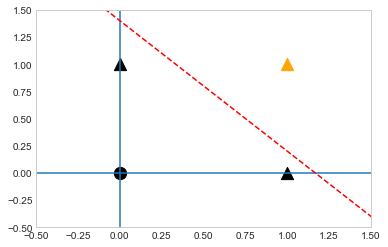

In [5]:
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-2,2,0.01)
bias = 0.7

y = (0.6*x1-bias) / -0.5

plt.axvline(x=0)
plt.axhline(y=0)

plt.plot(x1,y,'r--')

plt.scatter(0,0, color='black', marker='o', s=150)
plt.scatter(0,1, color='black', marker='^', s=150)
plt.scatter(1,0, color='black', marker='^', s=150)
plt.scatter(1,1, color='orange', marker='^', s=150)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()

In [6]:
def nand(a,b):
    input = np.array([a,b])
    weights = np.array([-0.6,-0.5])
    bias = 0.7
    value = np.sum(input*weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [7]:
def AND(a,b):
    input = np.array([a,b])
    weights = np.array([-0.4,-0.4])
    bias = -0.6
    value = np.sum(input*weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [8]:
def OR(a,b):
    input = np.array([a,b])
    weights = np.array([0.4,0.5])
    bias = -0.3
    value = np.sum(input*weights) + bias
    
    if value <= 0:
        return 0
    else:
        return 1

In [9]:
def XOR(x1,x2):
    s1= nand(x1,x2)
    s2= OR(x1,x2)
    y=AND(s1,s2)
    return y

In [10]:
XOR(0,1)

0

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
X = np.array([1.0,0.5,0.4])

W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6],[0.3,0.5,0.7]])
B1 = np.array([1,1,1])

print(W1.shape)

A1 = np.dot(X,W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(3, 3)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [22]:
W2 = np.array([[0.2,0.4,0.6],[0.1,0.3,0.5],[0.4,0.6,0.8]])
B2 = np.array([1,1,1])

print(W2.shape)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

print(Z2)

(3, 3)
[0.83173411 0.89116528 0.93133834]


In [20]:
W3 = np.array([[0.1,0.3],[-0.1,-0.5],[0.3,0.5]])
B3 = np.array([1,1])

print(W3.shape)

A3 = np.dot(Z2,W3) + B3
Z3 = sigmoid(A3)

print(Z3)

(3, 2)
[0.78133419 0.78067542]


In [23]:
np.dot(Z2,W3)

array([0.27345838, 0.26960676])

In [28]:
np.dot([1,2,3],[[1,2],[2,3],[3,4]])

array([14, 20])

In [29]:
np.dot([1,2,3],[[1],[2],[3]])

array([14])

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [4]:
(tr_ip, tr_tg), (te_ip, te_tg) = mnist.load_data()
print(tr_ip.shape)
print(tr_tg.shape)
print(te_ip.shape)
print(te_tg.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
from sklearn.model_selection import train_test_split

tr_ip = tr_ip.reshape(60000, 28*28).astype('float32')/255.0
te_ip = te_ip.reshape(10000, 28*28).astype('float32')/255.0
tr_tg = keras.utils.to_categorical(tr_tg,10)
te_tg = keras.utils.to_categorical(te_tg,10)

tf.random.set_seed(3)

tr_s, val_s, tr_tg, val_tg = train_test_split(tr_ip, tr_tg, test_size=0.2, random_state=42)

In [6]:
model = Sequential(name='6m')
model.add(Dense(units=512, input_dim=(28*28), activation='relu', name='hidden1'))
model.add(Dense(units=24, activation='relu', name='hidden2'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax', name='output'))
model.summary()

Model: "6m"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 24)                12312     
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 output (Dense)              (None, 10)                250       
                                                                 
Total params: 414,482
Trainable params: 414,482
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.save('model-whole.h5')

In [13]:
model = keras.models.load_model('model-whole.h5')

In [14]:
cp = keras.callbacks.ModelCheckpoint('model-whole.h5')

In [15]:
from keras.callbacks import EarlyStopping
e_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
from keras import callbacks
history = model.fit(tr_s, tr_tg, epochs=10, validation_split=0.3, callbacks=[cp, e_stop])

Epoch 1/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.4264 - accuracy: 0.8696 - val_loss: 0.1533 - val_accuracy: 0.9557
Epoch 2/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1897 - accuracy: 0.9464 - val_loss: 0.1171 - val_accuracy: 0.9635
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1301 - accuracy: 0.9633 - val_loss: 0.1016 - val_accuracy: 0.9694
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0967 - accuracy: 0.9721 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 5/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0756 - accuracy: 0.9785 - val_loss: 0.0952 - val_accuracy: 0.9728
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0658 - accuracy: 0.9814 - val_loss: 0.1134 - val_accuracy: 0.9704
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.1115 - val_accuracy:

In [17]:
model.evaluate(val_s, val_tg)

375/375 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9724


[0.09875666350126266, 0.9724166393280029]

In [18]:
print(e_stop.stopped_epoch)

6


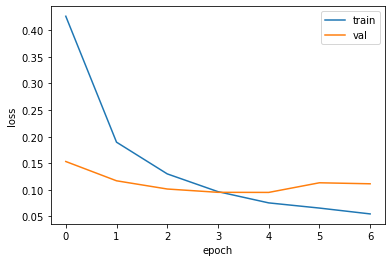

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
loss, accuracy = model.evaluate(te_ip, te_tg)
print(f'test loss : {loss:.3}')
print(f'test accuracy : {accuracy:.3}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9745
test loss : 0.0878
test accuracy : 0.975
